In [1]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt

In [2]:

x=np.array([[0,0,1,1],[0,1,0,1]])
y=np.array([[0,1,1,0]])

In [3]:

n_x =2
n_y = 1
n_h = 2
m = x.shape[1]
lr = 0.1



In [4]:

w1 = np.random.rand(n_h, n_x)
w2 = np.random.rand(n_y, n_h)


In [5]:
losses = []
def sigmoid(z):
  return 1 / (1 + np.exp(-z))


In [6]:
def forward_prop(w1,w2,x):
    z1 = np.dot(w1,x)
    a1 = sigmoid(z1)
    z2 = np.dot(w2,a1)
    a2 = sigmoid(z2)
    return z1,a1,z2,a2

In [7]:





def back_prop(m, w1, w2, z1, a1, z2, a2, y):
  dz2 = a2 - y
  dw2 = np.dot(dz2, a1.T) / m
  dz1 = np.dot(w2.T, dz2) * a1 * (1 - a1)
  dw1 = np.dot(dz1, x.T) / m
  return dz2, dw2, dz1, dw1



In [8]:

iterations = 10000
for i in range(iterations):
  z1, a1, z2, a2 = forward_prop(w1, w2, x)
  loss = -(1/m) * np.sum(y * np.log(a2) + (1 - y) * np.log(1 - a2))
  losses.append(loss)
  dz2, dw2, dz1, dw1 = back_prop(m, w1, w2, z1, a1, z2, a2, y)
  w2 -= lr * dw2
  w1 -= lr * dw1




Text(0, 0.5, 'Loss value')

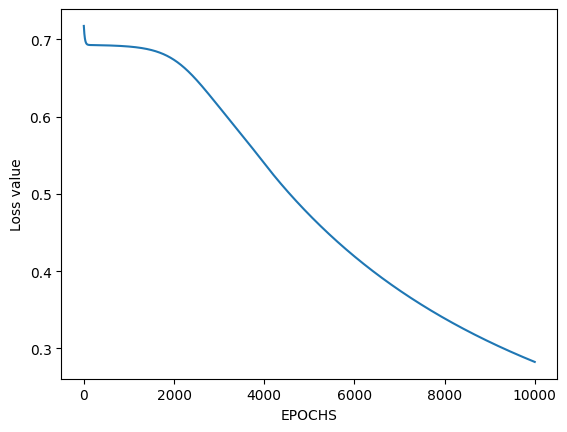

In [9]:

plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")

In [10]:

def predict(w1, w2, input):
  _, _, _, a2 = forward_prop(w1, w2, input)
  result = 1 if np.squeeze(a2) >= 0.5 else 0
  print(f"Input: {[i[0] for i in input]}  Output: {result}")




In [11]:
print('--- Prediction Results ---')
predict(w1, w2, np.array([[1],[0]]))
predict(w1, w2, np.array([[1],[1]]))
predict(w1, w2, np.array([[0],[1]]))
predict(w1, w2, np.array([[0],[0]]))

--- Prediction Results ---
Input: [np.int64(1), np.int64(0)]  Output: 1
Input: [np.int64(1), np.int64(1)]  Output: 0
Input: [np.int64(0), np.int64(1)]  Output: 1
Input: [np.int64(0), np.int64(0)]  Output: 0
